In [44]:
import importlib
import os
import sys

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as md

In [45]:
# Makes sure modules are available to the notebook that acts as an entrypoint

parent_dir = os.path.abspath('..')

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [46]:
# Manually reloading python module such that jupyter reflects changes without kernel restart

import plutus.code.calc.mc as mc

importlib.reload(mc);

In [47]:
import plutus.code.api_connector as ac

importlib.reload(ac);

In [48]:
ticker = 'SPY'
start_date = '2023-04-28-00:00'
end_date = '2023-06-01-00:00'

api_connector = ac.ApiConnector()
api_connector.ticker = ticker
api_connector.start_date = start_date
api_connector.end_date = end_date

df = api_connector.request_daily_prices()

df

Price for SPY are available on disk. Reading


datetime   close    high     low    open  volume
0     2023-04-28 04:00:00  411.17  411.51  411.17  411.51    2080
1     2023-04-28 04:01:00  411.07  411.16  411.05  411.16    2546
2     2023-04-28 04:02:00  411.00  411.01  411.00  411.01    1603
3     2023-04-28 04:03:00  411.19  411.19  411.02  411.08    1260
4     2023-04-28 04:04:00  411.10  411.10  411.10  411.10     300
...                   ...     ...     ...     ...     ...     ...
18783 2023-05-31 19:56:00  418.39  418.39  418.39  418.39    1498
18784 2023-05-31 19:57:00  418.45  418.45  418.38  418.38    1057
18785 2023-05-31 19:58:00  418.39  418.43  418.39  418.43     819
18786 2023-05-31 19:59:00  418.40  418.42  418.40  418.41    9279
18787 2023-05-31 20:00:00  418.41  418.41  418.41  418.41    1900

[18788 rows x 6 columns]

In [49]:
mc_calculator = mc.MarkovChainsCalculator()

mc_calculator.dataframe = df

mc_calculator.compute_markov_chains()

df

state            down      flat        up
prior_state                              
down         0.443057  0.059660  0.497283
flat         0.432883  0.159651  0.407466
up           0.481135  0.060930  0.457934


datetime   close    high     low    open  volume   u_prob  \
0     2023-04-28 04:00:00  411.17  411.51  411.17  411.51    2080  0.47267   
1     2023-04-28 04:01:00  411.07  411.16  411.05  411.16    2546  0.47267   
2     2023-04-28 04:02:00  411.00  411.01  411.00  411.01    1603  0.47267   
3     2023-04-28 04:03:00  411.19  411.19  411.02  411.08    1260  0.47267   
4     2023-04-28 04:04:00  411.10  411.10  411.10  411.10     300  0.47267   
...                   ...     ...     ...     ...     ...     ...      ...   
18783 2023-05-31 19:56:00  418.39  418.39  418.39  418.39    1498  0.47267   
18784 2023-05-31 19:57:00  418.45  418.45  418.38  418.38    1057  0.47267   
18785 2023-05-31 19:58:00  418.39  418.43  418.39  418.43     819  0.47267   
18786 2023-05-31 19:59:00  418.40  418.42  418.40  418.41    9279  0.47267   
18787 2023-05-31 20:00:00  418.41  418.41  418.41  418.41    1900  0.47267   

         d_prob    f_prob  
0      0.460374  0.066955  
1      0.460374  0.066955  
2      0.460374  0.066955  
3      0.460374  0.066955  
4      0.460374  0.066955  
...         ...       ...  
18783  0.460374  0.066955  
18784  0.460374  0.066955  
18785  0.460374  0.066955  
18786  0.460374  0.066955  
18787  0.460374  0.066955  

[18788 rows x 9 columns]

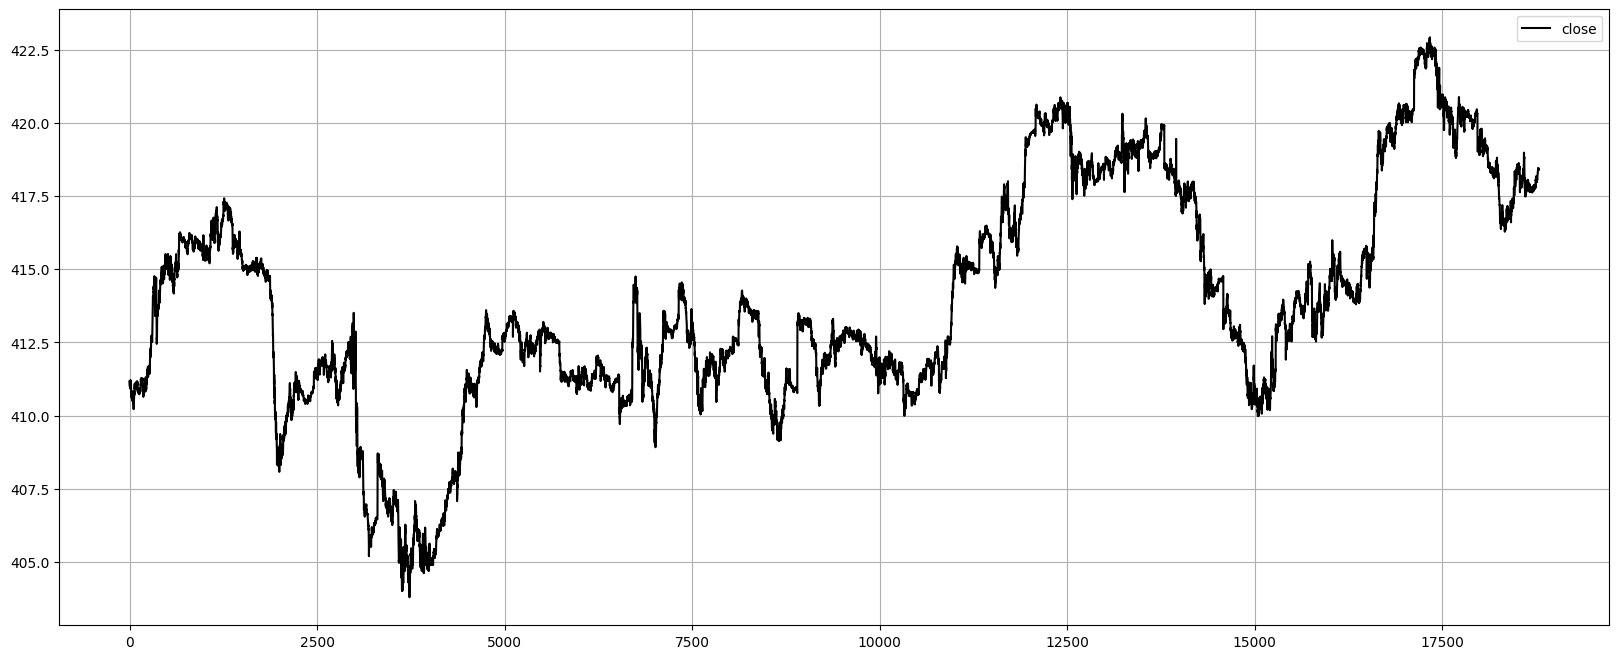

In [50]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(df['close'], color='black', label='close')

# ax.plot(
#     df[df['state'] == 'flat'].index,
#     df['Close'][df['state'] == 'flat'],
#     '.',
#     markersize = 7.5, color = 'blue', label = 'flat'
# )

ax.grid()
ax.legend();